In [57]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [77]:
df = pd.read_csv("Documents/income_Demo.csv")
df.head()

Name  Age  Income
0      Rob   27   70000
1  Michael   29   90000
2    Mohan   29   61000
3   Ismail   28   60000
4     Kory   42  150000

In [78]:
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

Text(0, 0.5, 'Income')

In [79]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']]) # runs k means algo in age and income and compute cluster as per n_clusters
y_predicted # clusters assigned with different values 0,1,2 can be seen below

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2])

In [80]:
df['cluster']=y_predicted
df.head()

Name  Age  Income  cluster
0      Rob   27   70000        0
1  Michael   29   90000        2
2    Mohan   29   61000        0
3   Ismail   28   60000        0
4     Kory   42  150000        1

In [81]:
km.cluster_centers_ # centroids

array([[3.12727273e+01, 5.72272727e+04],
       [3.85000000e+01, 1.49166667e+05],
       [3.60000000e+01, 8.50000000e+04]])

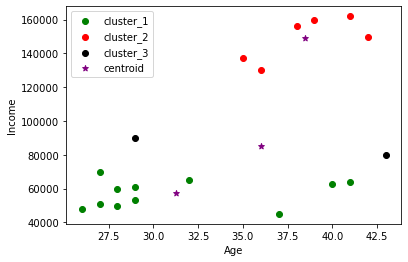

In [82]:
df1 = df[df.cluster==0] # returning all rows from dataframe where cluster value is 0
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green', label='cluster_1')
plt.scatter(df2.Age,df2['Income'],color='red' ,label='cluster_2')
plt.scatter(df3.Age,df3['Income'],color='black' ,label='cluster_3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#[:,0]->go through all 3 rows and 0 represnt 1st column in km.cluster_centers_ (x-axis)
#[:,1]->go through all 3 rows and 0 represnt 2nd column in km.cluster_centers_ (y-axis)
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
# below figure shows our scaling is not correct due to which correct clusters can't be formed(see colors of dataset) ,
# so we have to use MinMaxScaler to make no lie between 0 and 1

In [83]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [84]:
df.head()

Name       Age    Income  cluster
0      Rob  0.058824  0.213675        0
1  Michael  0.176471  0.384615        2
2    Mohan  0.176471  0.136752        0
3   Ismail  0.117647  0.128205        0
4     Kory  0.941176  0.897436        1

In [85]:
plt.scatter(df.Age,df['Income'])

In [86]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2])

In [87]:
df['cluster']=y_predicted
df.head()

Name       Age    Income  cluster
0      Rob  0.058824  0.213675        1
1  Michael  0.176471  0.384615        1
2    Mohan  0.176471  0.136752        1
3   Ismail  0.117647  0.128205        1
4     Kory  0.941176  0.897436        0

In [88]:
km.cluster_centers_

array([[0.73529412, 0.89031339],
       [0.1372549 , 0.13532764],
       [0.83823529, 0.15384615]])

In [89]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green', label='cluster_1')
plt.scatter(df2.Age,df2['Income'],color='red', label='cluster_2')
plt.scatter(df3.Age,df3['Income'],color='black' , label='cluster_3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#[:,0]->go through all 3 rows and 0 represnt 1st column in km.cluster_centers_ ie 0.73529412,0.1372549 ,0.83823529  (x-axis)
#[:,1]->go through all 3 rows and 0 represnt 2nd column in km.cluster_centers_ ie 0.89031339,0.13532764 ,0.15384615 (y-axis)
plt.legend()

In [90]:
# elbow method
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_) #km.inertia provides sum of sse

In [91]:
sse # SSE keeps on decreasing

[4.7534823751266515,
 1.6514313508667262,
 0.4868155153326539,
 0.3395997619890798,
 0.24565057359396825,
 0.16536113098086308,
 0.12696164825523354,
 0.0955275743227123,
 0.0678512216530139]

In [92]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)